## Librerías

In [2]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import date,datetime
from dateutil.relativedelta import relativedelta as rd
import seaborn as sns
%matplotlib inline

## Carga de Datos

In [3]:
df = pd.read_excel('data/churn.xlsx')

In [4]:
df.shape

(2801, 14)

In [5]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


## Análisis Básico

In [6]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [7]:
df.describe()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
count,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000
mean,101.033559,7.805784,30.545812,100.234559,17.108693,100.231703,9.025773,4.443770,2.778911,1.544448,0.135309,1674.363442
std,37.575889,13.349831,8.630344,18.625260,4.043765,18.488439,2.132611,2.276855,0.684567,1.267832,0.342114,957.140286
min,12.000000,0.000000,8.810000,53.000000,6.740000,57.000000,3.570000,1.000000,0.890000,0.000000,0.000000,1.000000
25%,74.000000,0.000000,24.480000,87.000000,14.220000,87.000000,7.520000,3.000000,2.320000,1.000000,0.000000,843.000000
50%,101.000000,0.000000,30.460000,100.000000,17.200000,100.000000,9.040000,4.000000,2.780000,1.000000,0.000000,1684.000000
75%,127.000000,18.000000,36.670000,113.000000,19.980000,113.000000,10.540000,6.000000,3.240000,2.000000,0.000000,2495.000000
max,195.000000,43.000000,51.880000,147.000000,27.120000,147.000000,14.300000,13.000000,4.510000,6.000000,1.000000,3333.000000


array([[<AxesSubplot:title={'center':'V_ACCT_LGHT'}>,
        <AxesSubplot:title={'center':'V_N_VM_MESS'}>,
        <AxesSubplot:title={'center':'V_T_DAY_CHG'}>],
       [<AxesSubplot:title={'center':'V_T_EVE_CALLS'}>,
        <AxesSubplot:title={'center':'V_T_EVE_CHG'}>,
        <AxesSubplot:title={'center':'V_T_NIG_CALLS'}>],
       [<AxesSubplot:title={'center':'V_T_NIG_CHG'}>,
        <AxesSubplot:title={'center':'V_T_INT_CALLS'}>,
        <AxesSubplot:title={'center':'V_T_INT_CHG'}>],
       [<AxesSubplot:title={'center':'V_CS_CALLS'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'ID'}>]], dtype=object)

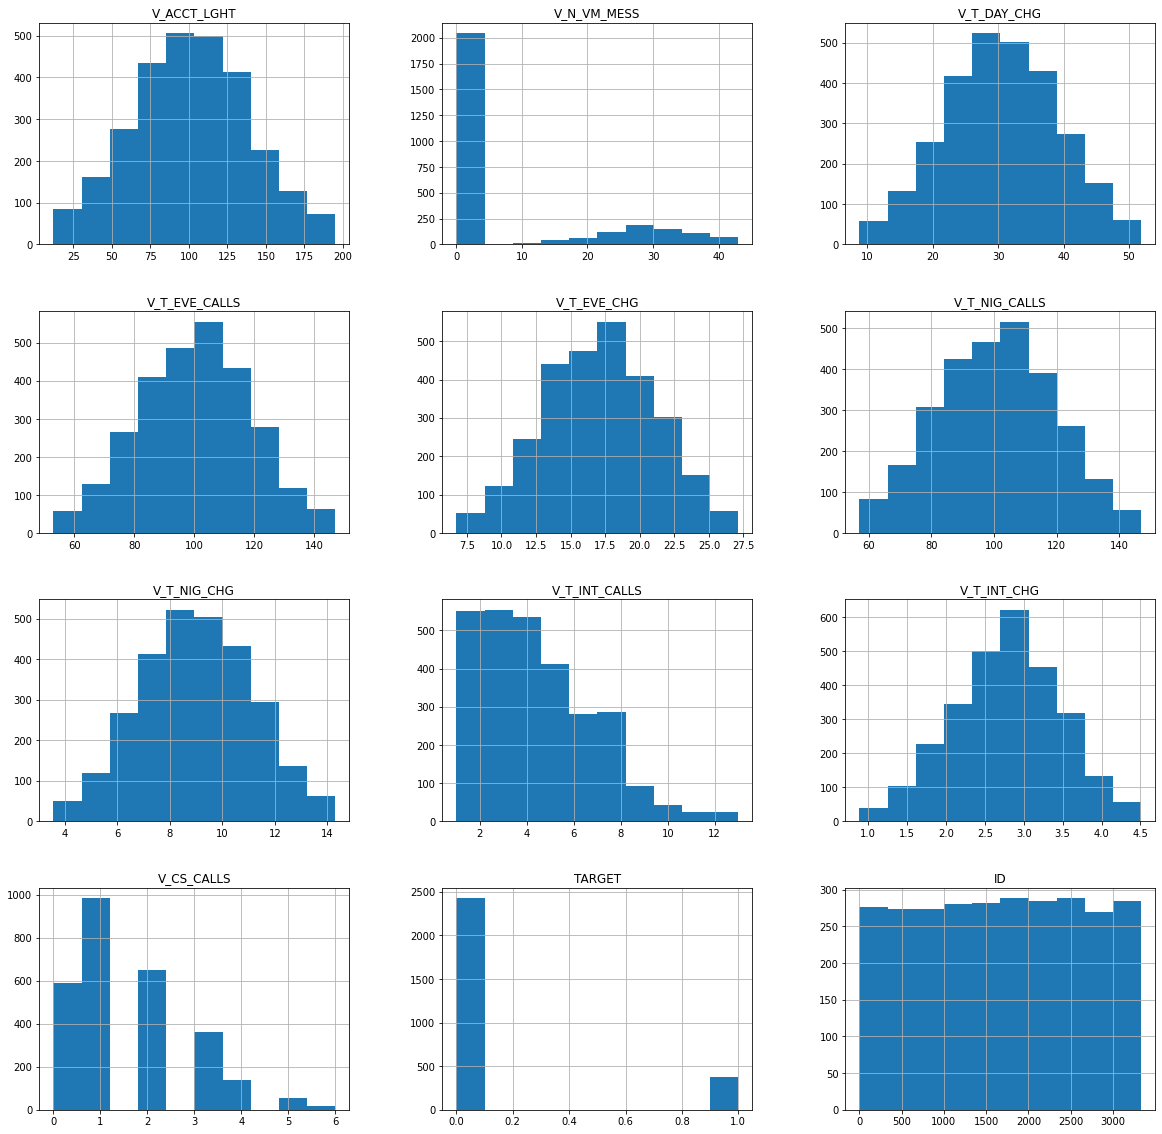

In [8]:
df.hist(figsize=(20,20))

In [10]:
df['TARGET'].value_counts(True)

0    0.864691
1    0.135309
Name: TARGET, dtype: float64

## Reducción de Dimensiones

### Definición de escala de variables

In [12]:
varc = [v for v in df.columns if v[:2]=='V_']
vard = [v for v in df.columns if v[:2]=='C_']

In [13]:
len(varc)

10

### Matriz de Trabajo

In [14]:
X = df[varc].copy()

In [15]:
X.head()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS
0,128,25,45.07,99,16.78,91,11.01,3,2.70,1
1,107,26,27.47,103,16.62,103,11.45,3,3.70,1
2,137,0,41.38,110,10.30,104,7.32,5,3.29,0
3,65,0,21.95,83,19.42,111,9.40,6,3.43,4
4,168,0,21.90,71,8.92,128,6.35,2,3.02,1


### Análisis de correlación lineal 

$\rho_{x,y}=\frac{Cov(x,y)}{\sigma_x,\sigma_y}$ Coef. de correl. de Pearson

In [16]:
X.corr()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS
V_ACCT_LGHT,1.000000,0.006403,0.010144,0.038824,-0.001538,0.002904,-0.018335,0.024117,0.018412,-0.012671
V_N_VM_MESS,0.006403,1.000000,-0.000774,-0.010961,0.019215,-0.000553,-0.001205,0.011003,0.005651,-0.009471
V_T_DAY_CHG,0.010144,-0.000774,1.000000,0.010303,0.005383,0.008111,0.002601,0.002464,-0.001028,-0.013518
V_T_EVE_CALLS,0.038824,-0.010961,0.010303,1.000000,-0.007616,0.007311,0.012856,0.000585,-0.018310,-0.015075
V_T_EVE_CHG,-0.001538,0.019215,0.005383,-0.007616,1.000000,-0.012306,-0.014571,0.020250,-0.000887,-0.030214
V_T_NIG_CALLS,0.002904,-0.000553,0.008111,0.007311,-0.012306,1.000000,0.011997,-0.002452,0.002729,-0.015318
V_T_NIG_CHG,-0.018335,-0.001205,0.002601,0.012856,-0.014571,0.011997,1.000000,0.002556,-0.027299,-0.027155
V_T_INT_CALLS,0.024117,0.011003,0.002464,0.000585,0.020250,-0.002452,0.002556,1.000000,-0.008221,-0.003557
V_T_INT_CHG,0.018412,0.005651,-0.001028,-0.018310,-0.000887,0.002729,-0.027299,-0.008221,1.000000,-0.009003
V_CS_CALLS,-0.012671,-0.009471,-0.013518,-0.015075,-0.030214,-0.015318,-0.027155,-0.003557,-0.009003,1.000000


### Estandarización

In [18]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [19]:
Xs = pd.DataFrame(sc.transform(X),columns=varc)

In [20]:
Xs.head()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS
0,0.717781,1.288203,1.683222,-0.066296,-0.081298,-0.499412,0.930588,-0.634220,-0.115292,-0.429509
1,0.158812,1.363123,-0.356459,0.148504,-0.120873,0.149758,1.136944,-0.634220,1.345746,-0.429509
2,0.957339,-0.584815,1.255584,0.524405,-1.684052,0.203855,-0.799995,0.244341,0.746720,-1.218398
3,-0.959125,-0.584815,-0.996177,-0.925498,0.571675,0.582538,0.175510,0.683622,0.951266,1.937157
4,1.782483,-0.584815,-1.001971,-1.569899,-2.025379,1.502196,-1.254917,-1.073501,0.352240,-0.429509


In [21]:
Xs.describe().round(2)

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS
count,2801.00,2801.00,2801.00,2801.00,2801.00,2801.00,2801.00,2801.00,2801.00,2801.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.37,-0.58,-2.52,-2.54,-2.56,-2.34,-2.56,-1.51,-2.76,-1.22
25%,-0.72,-0.58,-0.70,-0.71,-0.71,-0.72,-0.71,-0.63,-0.67,-0.43
50%,-0.00,-0.58,-0.01,-0.01,0.02,-0.01,0.01,-0.19,0.00,-0.43
75%,0.69,0.76,0.71,0.69,0.71,0.69,0.71,0.68,0.67,0.36
max,2.50,2.64,2.47,2.51,2.48,2.53,2.47,3.76,2.53,3.51


### Componentes Principales

In [22]:
pca = PCA()
pca.fit(Xs)

PCA()

In [23]:
pca.explained_variance_ratio_.cumsum()

array([0.10674718, 0.21214068, 0.31576573, 0.41756091, 0.51726562,
       0.61637638, 0.71467246, 0.81221384, 0.90644007, 1.        ])

In [25]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['d%d'%(i+1) for i in range(len(varc))])

In [26]:
Xp.corr().round(2)

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
d1,1.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
d2,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
d3,-0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
d4,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
d5,0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0
d6,-0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,0.0
d7,-0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,0.0
d8,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0
d9,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,1.0,-0.0
d10,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0


### Visualización en dos dimensiones

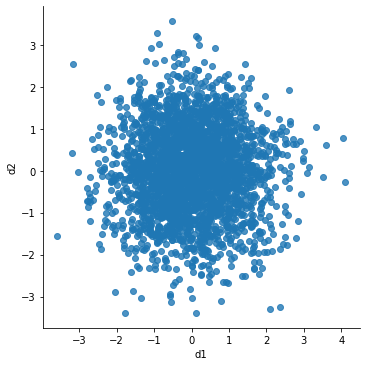

In [29]:
sns.lmplot(data=Xp,x='d1',y='d2',fit_reg=False)